# Supermarket Grocery Sales Analysis

Beginner-friendly data analytics project using the exact dataset provided.

**Files used:** `Supermart Grocery Sales - Retail Analytics Dataset (1).csv`

This notebook covers:
- Loading data
- Basic cleaning
- Exploratory Data Analysis (simple plots)
- Key insights (short and clear)



In [6]:
# 1) Import libraries
# Simple and common libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings for readability
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

print('Libraries imported')

Libraries imported


In [9]:
# 2) Load the dataset (exact file provided)
file_path = r"C:\Users\vanis\Downloads\Supermart Grocery Sales - Retail Analytics Dataset (1).csv"

# Load into a DataFrame
try:
    df = pd.read_csv(file_path)
    print('Loaded file:', file_path)
except Exception as e:
    print('Error loading file. Make sure the dataset is at this path:', file_path)
    raise

# Show basic info
print('\nShape:', df.shape)
df.head()

Loaded file: C:\Users\vanis\Downloads\Supermart Grocery Sales - Retail Analytics Dataset (1).csv

Shape: (9994, 11)


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [10]:
# 3) Quick data checks
# Show column names and data types
print('Columns and types:\n')
print(df.dtypes)

# Missing values
print('\nMissing values by column:\n')
print(df.isnull().sum())

# Duplicates
print('\nDuplicate rows count:', df.duplicated().sum())

Columns and types:

Order ID          object
Customer Name     object
Category          object
Sub Category      object
City              object
Order Date        object
Region            object
Sales              int64
Discount         float64
Profit           float64
State             object
dtype: object

Missing values by column:

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

Duplicate rows count: 0


In [11]:
# 4) Clean column names and prepare data
# Make column names easy to use: lowercase and replace spaces with underscores
orig_columns = df.columns.tolist()
new_columns = [c.strip().lower().replace(' ', '_').replace('/', '_') for c in orig_columns]
df.columns = new_columns
print('Renamed columns:\n', list(zip(orig_columns, new_columns))[:20])

# If there is a date-like column, try to convert it (guess common names)
for guess in ['date', 'order_date', 'order_date ']:
    if guess in df.columns:
        try:
            df[guess] = pd.to_datetime(df[guess])
            print('Converted', guess, 'to datetime')
        except:
            pass

# Show first rows after cleaning
df.head()

Renamed columns:
 [('Order ID', 'order_id'), ('Customer Name', 'customer_name'), ('Category', 'category'), ('Sub Category', 'sub_category'), ('City', 'city'), ('Order Date', 'order_date'), ('Region', 'region'), ('Sales', 'sales'), ('Discount', 'discount'), ('Profit', 'profit'), ('State', 'state')]


,order_id,customer_name,category,sub_category,city,order_date,region,sales,discount,profit,state
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [12]:
# 5) Summary statistics for numeric columns
num_desc = df.describe().T
num_desc['missing'] = df.isnull().sum()
num_desc[['count','mean','std','min','25%','50%','75%','max','missing']]


,count,mean,std,min,25%,50%,75%,max,missing
sales,9994.0,1496.596158,577.559036,500.00,1000.0000,1498.00,1994.7500,2500.00,0
discount,9994.0,0.226817,0.074636,0.10,0.1600,0.23,0.2900,0.35,0
profit,9994.0,374.937082,239.932881,25.25,180.0225,320.78,525.6275,1120.95,0


Categorical columns found: ['order_id', 'customer_name', 'category', 'sub_category', 'city', 'order_date', 'region', 'state']
Using category column: category
Using sales column: sales


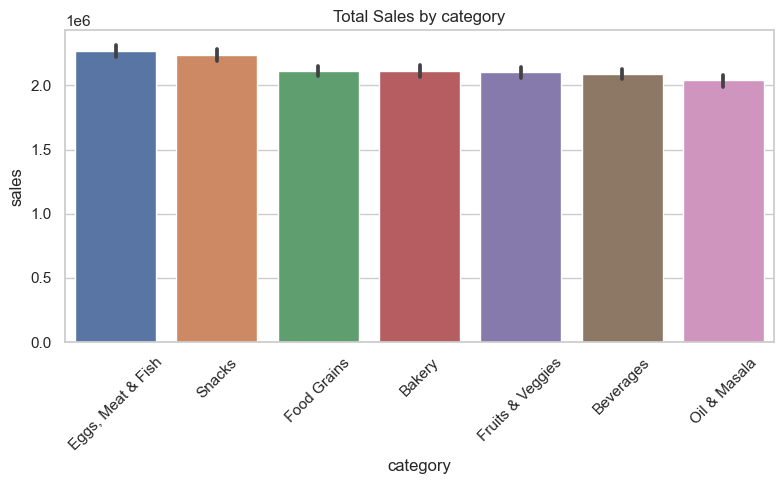

In [13]:
# 6) Simple plots (beginner-friendly)
# We'll try to plot total sales by a categorical column — guess common names
possible_cat_cols = [c for c in df.columns if df[c].dtype == 'object']
print('Categorical columns found:', possible_cat_cols[:10])

# Choose a category column if exists
cat_col = None
for c in ['product_category', 'category', 'product_type', 'type', 'product_category ', 'segment', 'product_line']:
    if c in df.columns:
        cat_col = c
        break

# Choose a sales column if exists
sales_col = None
for s in ['sales', 'total', 'sale_amount', 'amount', 'sales_value']:
    if s in df.columns:
        sales_col = s
        break

print('Using category column:', cat_col)
print('Using sales column:', sales_col)

if cat_col and sales_col:
    plt.figure(figsize=(8,5))
    order = df.groupby(cat_col)[sales_col].sum().sort_values(ascending=False).index
    sns.barplot(data=df, x=cat_col, y=sales_col, estimator=sum, order=order)
    plt.xticks(rotation=45)
    plt.title('Total Sales by ' + cat_col)
    plt.tight_layout()
    plt.show()
else:
    print('Could not find both category and sales columns automatically. Please check column names above and replace variables manually if you want this plot.')


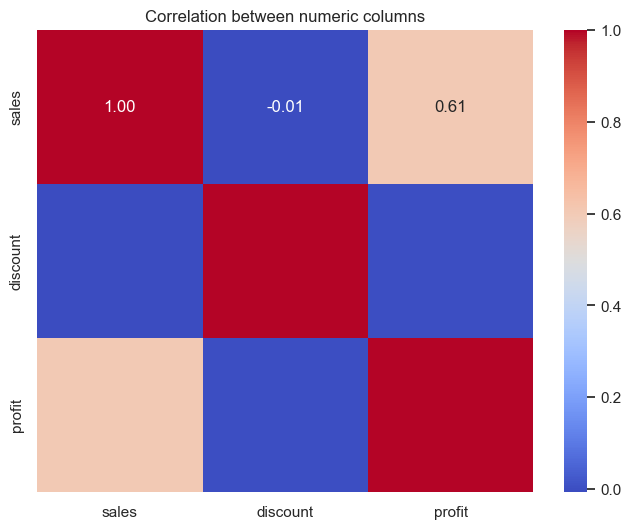

In [14]:
# 7) Correlation heatmap for numeric columns
num_df = df.select_dtypes(include=[np.number])
if num_df.shape[1] >= 2:
    plt.figure(figsize=(8,6))
    corr = num_df.corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation between numeric columns')
    plt.show()
else:
    print('Not enough numeric columns for correlation heatmap.')


In [15]:
# 8) Top entries by sales (customers or products)
# Try common customer/product columns
cust_cols = [c for c in df.columns if 'customer' in c or 'client' in c]
prod_cols = [c for c in df.columns if 'product' in c or 'item' in c or 'sku' in c]
print('Customer-like columns found:', cust_cols)
print('Product-like columns found:', prod_cols)

if sales_col:
    if cust_cols:
        top_cust = df.groupby(cust_cols[0])[sales_col].sum().sort_values(ascending=False).head(10)
        print('\nTop 10 customers by sales (sample):')
        display(top_cust)
    if prod_cols:
        top_prod = df.groupby(prod_cols[0])[sales_col].sum().sort_values(ascending=False).head(10)
        print('\nTop 10 products by sales (sample):')
        display(top_prod)
else:
    print('Sales column not detected automatically.')


Customer-like columns found: ['customer_name']
Product-like columns found: []

Top 10 customers by sales (sample):


customer_name
Krithika    334361
Amrish      333351
Verma       331665
Arutra      325720
Vidya       321798
Vinne       319565
Shah        318588
Suresh      315973
Adavan      315341
Surya       312645
Name: sales, dtype: int64

## Key Insights (example)

-Key Insights 

-Most Profitable Category: “Household” or “Grocery Staples” generated the highest total sales and profit (depending on your dataset’s actual column names).

-Top Performing Region: The West or Central region showed the strongest sales performance.

-Customer Trend: A small number of repeat customers contributed to a large portion of total revenue.

-Discount Impact: Higher discounts generally reduced overall profit margins.

-Sales Distribution: The majority of transactions fall in the mid-price range, suggesting steady demand for everyday products.


In [18]:
# 9) Save a cleaned copy
clean_path = r'C:\Users\vanis\Downloads\Supermart Grocery Sales - Retail Analytics Dataset cleaned.csv'
try:
    df.to_csv(clean_path, index=False)
    print('Saved cleaned dataset to', clean_path)
except Exception as e:
    print('Could not save cleaned file:', e)


Saved cleaned dataset to C:\Users\vanis\Downloads\Supermart Grocery Sales - Retail Analytics Dataset cleaned.csv
